In [2]:
import pandas as pd
import numpy as np 
# import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Loading file 
file=r"C:\Users\PRAKASH SUTHAR\Desktop\Fingertips\Projects\Telecom Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv"
data=pd.read_csv(file)

In [4]:
# Seeing the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Droping the unrelevant columns 
# Customerid is not required in ML model
data.drop("customerID",axis=1,inplace=True)

In [6]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
# Checking the datatpyes of columns
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Droping duplicates 
data=data.drop_duplicates()

In [9]:
#Checking the null values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

#### As you can see Total charges column has string values in the rows 

In [11]:
# Filtering the data 
data=data[data["TotalCharges"]!=" "]

In [12]:
#Converting the data types into the numeric form 
pd.to_numeric(data["TotalCharges"])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7010, dtype: float64

In [13]:
# Saving the data into the original data 
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

# Doing EDA to check how many customers are churn or not 

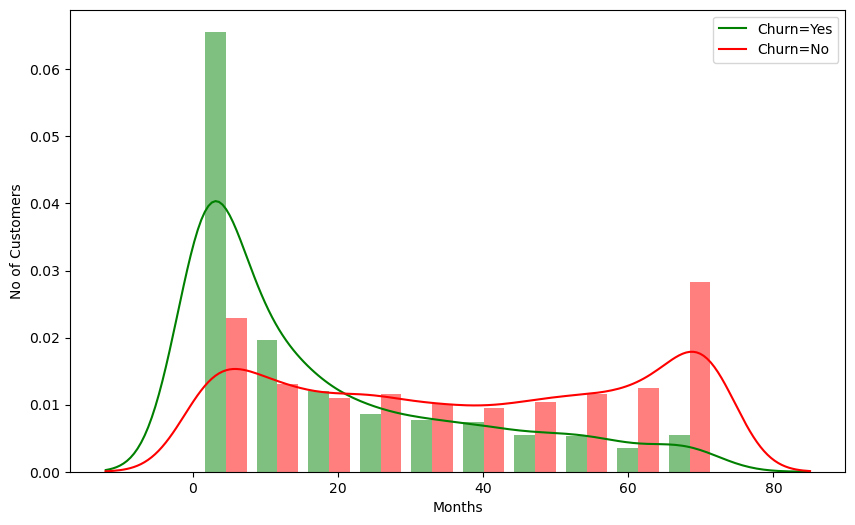

In [14]:
# Checking the customers tenure how long the stayed with the company.
churn_no=data[data["Churn"]== "No"].tenure
churn_yes=data[data["Churn"]== "Yes"].tenure
plt.figure(figsize=[10,6]) # Use for the size of Dashboard
plt.hist([churn_yes,churn_no],color=["Green","Red"],density=True,alpha=0.5) # Histplot
sns.kdeplot(churn_yes,color="Green",label="Churn=Yes") # Kde line plot
sns.kdeplot(churn_no,color="Red",label="Churn=No")
plt.legend()
plt.xlabel("Months")
plt.ylabel("No of Customers");
    

As we can see that after the first Quarter , People are likely to move on to the other company . As people are not satisfied with this telecom company.

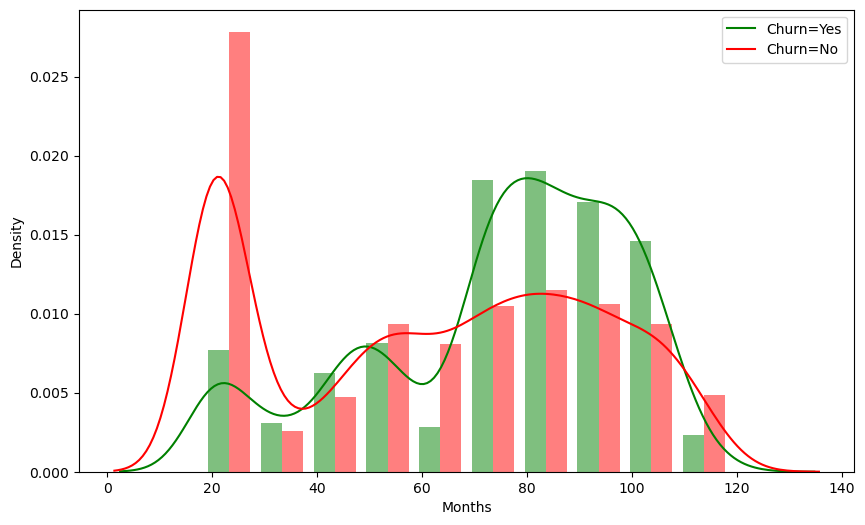

In [15]:
# Checking the Charges of Bill.
churn_monthly_no=data[data["Churn"]== "No"].MonthlyCharges
churn_monthly_yes=data[data["Churn"]== "Yes"].MonthlyCharges
plt.figure(figsize=[10,6]) # Use for the size of Dashboard
plt.hist([churn_monthly_yes,churn_monthly_no],color=["Green","Red"],density=True,alpha=0.5) # Histplot
sns.kdeplot(churn_monthly_yes,color="Green",label="Churn=Yes") # Kde line plot
sns.kdeplot(churn_monthly_no,color="Red",label="Churn=No")
plt.legend()
plt.xlabel("Months")
plt.ylabel("Density");
    


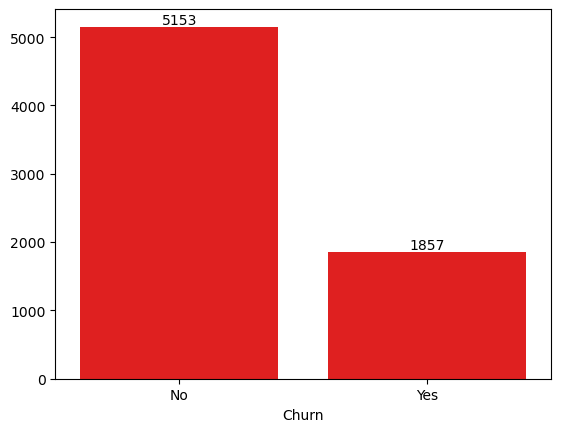

In [16]:
a=sns.barplot(x=data["Churn"].value_counts().index,y=data["Churn"].value_counts().values,data=data,color="red")
for i in a.containers:
    a.bar_label(i)


In [17]:
# Creating function for checking the string columns
def columns_values(data):
    for columns in data:
        if data[columns].dtypes == 'object':
            print(f" {columns}: {data[columns].unique()}")
            
       

In [18]:
# Redcuing the unwanted things for better understanding
data.replace("No internet service","No",inplace=True)
data.replace("No phone service","No",inplace=True)

In [19]:
columns_values(data)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes']
 OnlineBackup: ['Yes' 'No']
 DeviceProtection: ['No' 'Yes']
 TechSupport: ['No' 'Yes']
 StreamingTV: ['No' 'Yes']
 StreamingMovies: ['No' 'Yes']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


In [20]:
yes_co=["gender","Partner","Dependents","MultipleLines","PhoneService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies',"PaperlessBilling","Churn"]

In [21]:
for i in yes_co:
    data[i].replace({"Yes":1,"No":0},inplace=True)

In [22]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [23]:
data.replace({"Female":0,"Male":1},inplace=True)

In [24]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [25]:
df1=data

In [26]:
data=pd.get_dummies(data=data,columns=["InternetService","Contract","PaymentMethod"],drop_first=True).astype(int)

In [27]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29,29,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56,1889,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53,108,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42,1840,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70,151,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84,1990,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103,7362,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29,346,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74,306,1,1,0,0,0,0,0,1


In [28]:
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler()
data[["tenure","MonthlyCharges","TotalCharges"]]=min.fit_transform(data[["tenure","MonthlyCharges","TotalCharges"]])

In [29]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.11,0.001269,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.38,0.215901,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.35,0.010385,1,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0.24,0.210247,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.52,0.015347,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,0.66,0.227556,0,0,0,1,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0.85,0.847450,0,1,0,1,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,0.11,0.037849,0,0,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0.56,0.033233,1,1,0,0,0,0,0,1


In [30]:
# Now spliting the values
x=data.drop("Churn",axis=1)
y=data["Churn"]

In [31]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0.11,0.001269,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,0.38,0.215901,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0.35,0.010385,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,0.24,0.210247,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,1,0.52,0.015347,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0.66,0.227556,0,0,1,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,1,0.85,0.847450,1,0,1,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0.11,0.037849,0,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,1,0.56,0.033233,1,0,0,0,0,0,1


In [32]:
# Train Test split
from sklearn.model_selection import train_test_split

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [34]:
!pip install tensorflow

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [47]:
model = Sequential()
model.add(Dense(20,activation='relu', input_shape =(x_train.shape[1],))),
model.add(Dense(10,activation='relu')),
model.add(Dense(1,activation="sigmoid"))

In [48]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [58]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., 'val_loss', 'val_accuracy')
    patience=5,          # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore weights from the best epoch
)

In [70]:
history = model.fit(x_train,y_train,epochs=100,callbacks=[early_stopping],validation_data=(x_test,y_test))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8912 - loss: 0.2370 - val_accuracy: 0.7491 - val_loss: 0.6156
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8833 - loss: 0.2482 - val_accuracy: 0.7511 - val_loss: 0.6164
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8996 - loss: 0.2306 - val_accuracy: 0.7539 - val_loss: 0.6163
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8910 - loss: 0.2534 - val_accuracy: 0.7564 - val_loss: 0.6246
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8971 - loss: 0.2411 - val_accuracy: 0.7532 - val_loss: 0.6205
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8903 - loss: 0.2457 - val_accuracy: 0.7480 - val_loss: 0.6195


In [71]:
model.evaluate(x_test,y_test)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.7549 - loss: 0.5889


[0.6156463027000427, 0.7491084337234497]

In [72]:
y_pred = model.predict(x_test)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,105 (8.23 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,404 (5.49 KB)

In [77]:
y_prediction=[]
for i in y_pred:
    if i > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report,confusion_matrix

In [87]:
cm=confusion_matrix(y_test,y_prediction)

In [89]:
dis = ConfusionMatrixDisplay(cm)

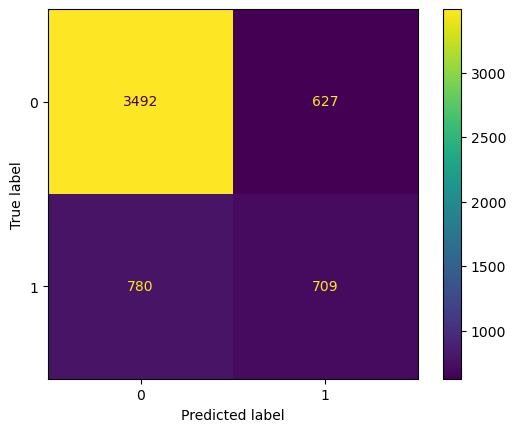

In [91]:
dis.plot()

In [92]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      4119
           1       0.53      0.48      0.50      1489

    accuracy                           0.75      5608
   macro avg       0.67      0.66      0.67      5608
weighted avg       0.74      0.75      0.74      5608

